<a href="https://colab.research.google.com/github/AliCodes22/AliCodes22/blob/main/Stock_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance pandas numpy matplotlib seaborn scikit-learn tensorflow keras statsmodels


In [30]:
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from ipywidgets import interact




In [6]:
data = yf.download('AAPL', start='2015-01-01', end='2024-01-01')


[*********************100%***********************]  1 of 1 completed


In [4]:
data.head()


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,,
2015-01-02 00:00:00+00:00,24.347174,27.332500,27.860001,26.837500,27.847500,212818400
2015-01-05 00:00:00+00:00,23.661276,26.562500,27.162500,26.352501,27.072500,257142000
2015-01-06 00:00:00+00:00,23.663496,26.565001,26.857500,26.157499,26.635000,263188400
2015-01-07 00:00:00+00:00,23.995314,26.937500,27.049999,26.674999,26.799999,160423600
2015-01-08 00:00:00+00:00,24.917267,27.972500,28.037500,27.174999,27.307501,237458000


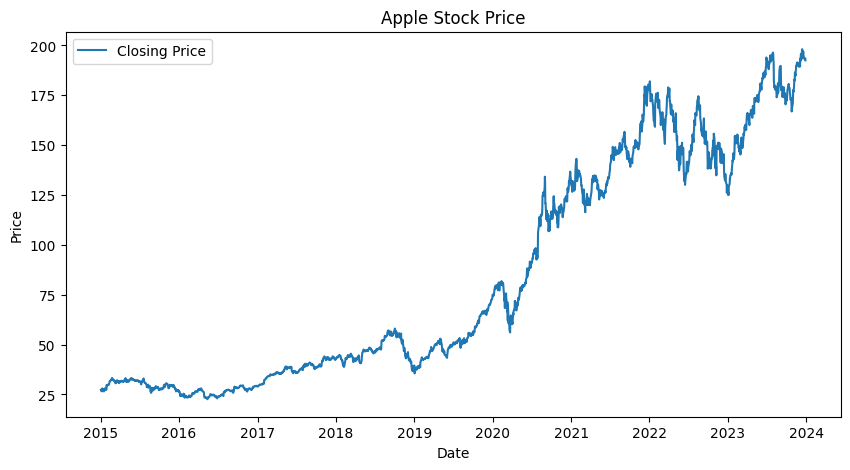

In [20]:
plt.figure(figsize=(10, 5))
plt.plot(data['Close'], label='Closing Price')
plt.title('Apple Stock Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


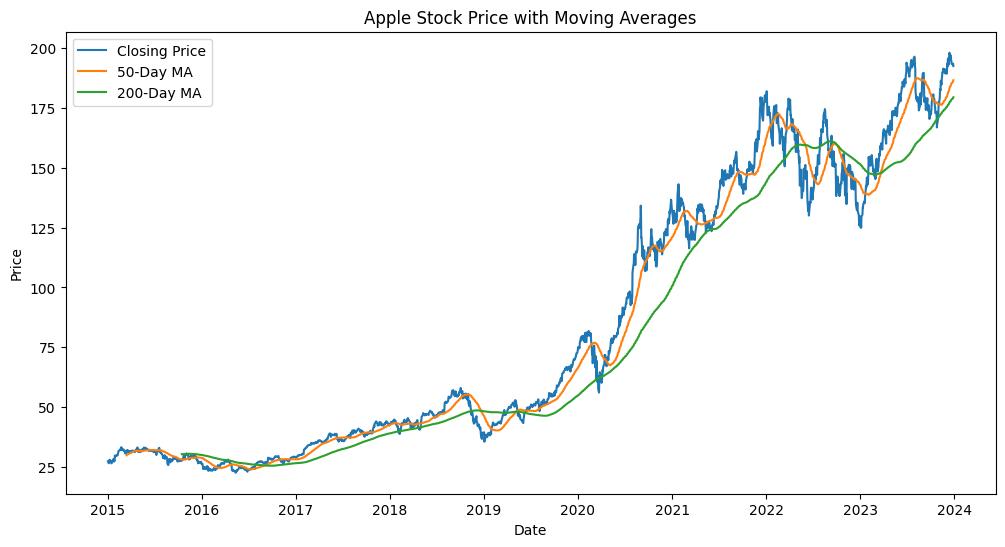

In [8]:
data['MA50'] = data['Close'].rolling(50).mean()
data['MA200'] = data['Close'].rolling(200).mean()

plt.figure(figsize=(12, 6))
plt.plot(data['Close'], label='Closing Price')
plt.plot(data['MA50'], label='50-Day MA')
plt.plot(data['MA200'], label='200-Day MA')
plt.title('Apple Stock Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

In [9]:
# feature scaling

In [15]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))


In [16]:
# LSTM

In [18]:
sequence_length = 60
x_data, y_data = [], []

for i in range(sequence_length, len(scaled_data)):
    x_data.append(scaled_data[i-sequence_length:i, 0])
    y_data.append(scaled_data[i, 0])

x_data, y_data = np.array(x_data), np.array(y_data)
x_data = np.reshape(x_data, (x_data.shape[0], x_data.shape[1], 1))


In [21]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.2, random_state=42)


In [25]:
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)),
    LSTM(units=50, return_sequences=False),
    Dense(units=25),
    Dense(units=1)
])

model.compile(optimizer='adam', loss='mean_squared_error')

model.fit(x_train, y_train, batch_size=1, epochs=1)



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1763/1763 ━━━━━━━━━━━━━━━━━━━━ 45s 24ms/step - loss: 0.0026


In [26]:
loss = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 5.0856e-04
Test Loss: 0.0005077800597064197


14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step


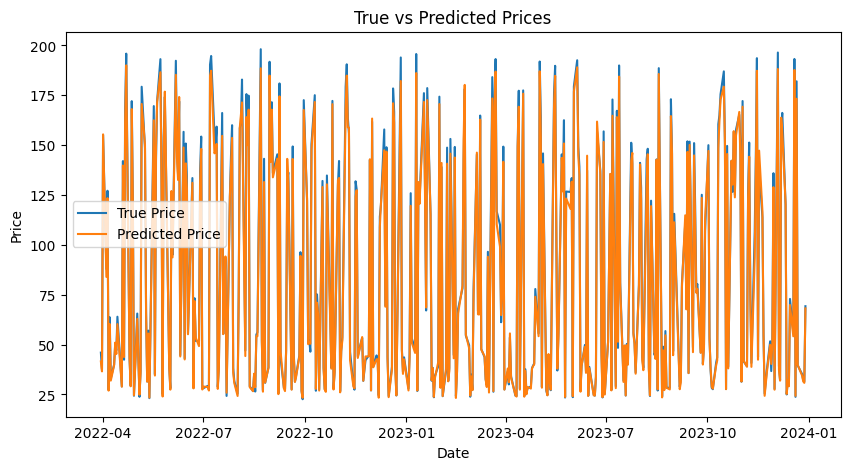

In [27]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))

plt.figure(figsize=(10, 5))
plt.plot(data.index[-len(y_test):], scaler.inverse_transform(y_test.reshape(-1, 1)), label='True Price')
plt.plot(data.index[-len(y_test):], predictions, label='Predicted Price')
plt.title('True vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [28]:
!pip install ipywidgets


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.0 MB/s eta 0:00:00


In [33]:
@interact(stock=['PLTR', 'MSFT', 'GOOG'])
def fetch_and_plot(stock):
    data = yf.download(stock, start='2015-01-01', end='2024-11-01')
    plt.figure(figsize=(10, 5))
    plt.plot(data['Close'], label='Closing Price')
    plt.title(f'{stock} Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.show()

interactive(children=(Dropdown(description='stock', options=('PLTR', 'MSFT', 'GOOG'), value='PLTR'), Output())…